# Imports

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns
import joblib
from IPython.core.display import HTML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

# Reading the csv file

In [3]:
df = pd.read_csv(r'news_articles.csv', encoding="latin", index_col=0)
df = df.dropna()
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [4]:
df.head(5)

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [5]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

# Distrubution of types of articles

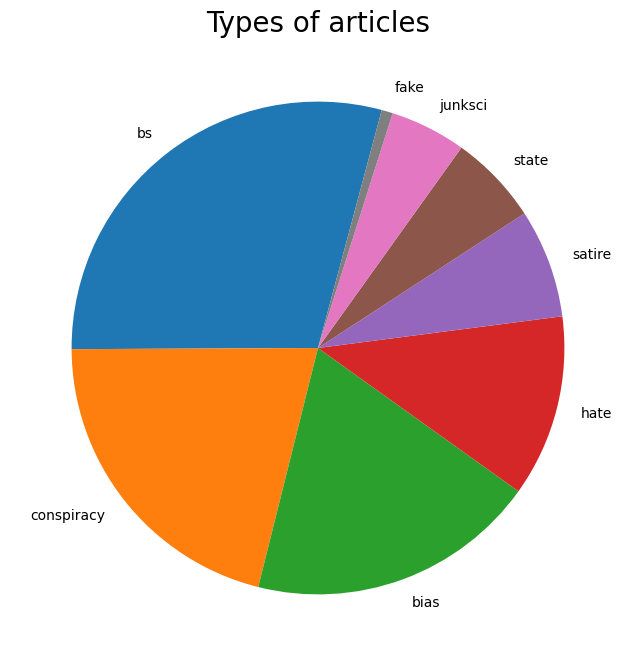

In [6]:
df['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

# Unigrams and bigrams 

In [7]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: title={'center': 'Top 20 bigrams used in articles'}, xlabel='words', ylabel='Count'>

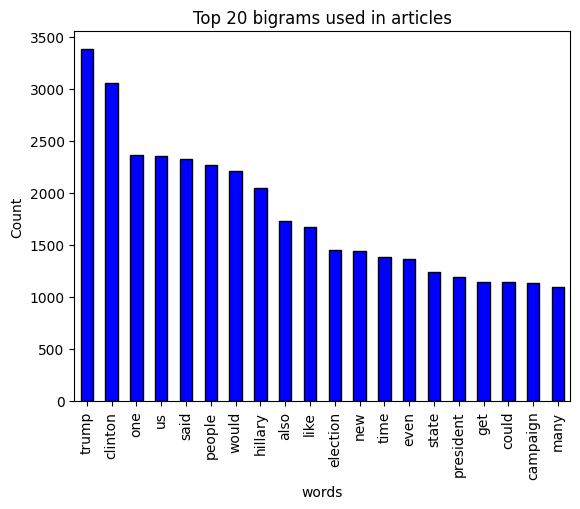

In [8]:
common_words = get_top_n_words(df['text_without_stopwords'], 20)
df3 = pd.DataFrame(common_words, columns=['words', 'count'])

df3.groupby('words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    ylabel='Count',  
    title='Top 20 bigrams used in articles',
    color='blue',
    edgecolor='black' 
)


<Axes: title={'center': 'Top 20 bigrams used in articles'}, xlabel='words', ylabel='Count'>

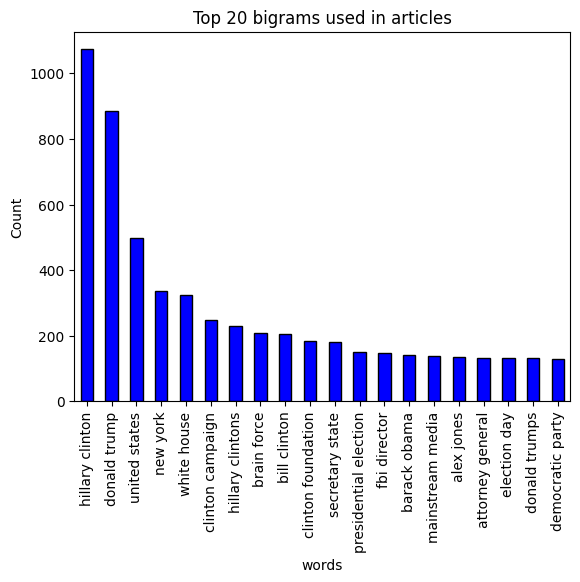

In [9]:
common_words = get_top_n_bigram(df['text_without_stopwords'], 20)
df3 = pd.DataFrame(common_words, columns=['words', 'count'])

df3.groupby('words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    ylabel='Count',  
    title='Top 20 bigrams used in articles',
    color='blue',
    edgecolor='black' 
)


# WordCloud of articles

# Articles including images vs Label

In [10]:
fig = px.bar(df, x='hasImage', y='label',title='Articles including images vs Label')
fig.show()

In [11]:
def convert(path):
    return '<img src="'+ path + '" width="80">'

In [12]:
df_sources = df[['site_url','label','main_img_url']]
df_r = df_sources.loc[df['label']== 'Real'].iloc[6:10,:]
df_f = df_sources.loc[df['label']== 'Fake'].head(6)

In [13]:
HTML(df_r.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
author,,,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,


In [14]:
HTML(df_f.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
author,,,
No Author,21stcenturywire.com,Fake,
No Author,21stcenturywire.com,Fake,
Shawn Helton,21stcenturywire.com,Fake,
Mike Rivero,21stcenturywire.com,Fake,
No Author,21stcenturywire.com,Fake,
Shawn Helton,21stcenturywire.com,Fake,


In [15]:
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [16]:
type_label = {'Real': 0, 'Fake': 1}
df_sources.label = [type_label[item] for item in df_sources.label] 

In [17]:
val_real=[]
val_fake=[]

for i,row in df_sources.iterrows():
    val = row['site_url']
    if row['label'] == 0:
        val_real.append(val)
    elif row['label']== 1:
        val_fake.append(val)

> # Websites publishing real news

In [18]:
uniqueValues_real = list(OrderedDict.fromkeys(val_real)) 

print(f"{y_}Websites publishing real news:{g_}{uniqueValues_real}\n") 

Websites publishing real news:['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'davidduke.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'newstarget.com', 'politicususa.com', 'presstv.com', 'presstv.ir', 'prisonplanet.com', 'proudemocrat.com', 'redstatewatcher.com', 'returnofkings.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']



# Websites publishing fake news

In [19]:
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake)) 
print(f"{y_}Websites publishing fake news:{r_}{uniqueValues_fake}\n")

Websites publishing fake news:['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net', 'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'awdnews.com', 'barenakedislam.com', 'clickhole.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'intrepidreport.com', 'legorafi.fr', 'madworldnews.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com', 'projectveritas.com', 'returnofkings.com', 'shiftfrequency.com', 'thedailysheeple.com', 'theeconomiccollapseblog.com', 'thefreethoughtproject.com',

# Websites publishing both real and fake news

In [20]:
real_set = set(uniqueValues_real) 
fake_set = set(uniqueValues_fake) 

print(f"{y_}Websites publishing both real and fake news:{m_}{real_set & fake_set}\n")

Websites publishing both real and fake news:{'westernjournalism.com', 'presstv.ir', 'fromthetrenchesworldreport.com', 'returnofkings.com', 'washingtonsblog.com', 'frontpagemag.com', 'davidduke.com', 'prisonplanet.com', 'newstarget.com'}



In [21]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type] 

In [22]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

# Label vs Type

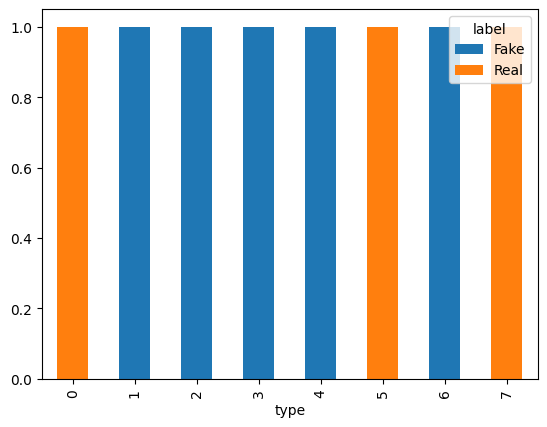

In [23]:
plot_bar(df,'type' , 'label')
plt.show()

In [24]:
fig = px.sunburst(df, path=['label', 'type'])
fig.show()

# Websites and types of news published

In [25]:
df_type = df[['site_url','type']]

val_bias=[]
val_conspiracy=[]
val_fake1=[]
val_bs=[]
val_satire=[]
val_hate=[]
val_junksci=[]
val_state=[]
{'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
for i,row in df_type.iterrows():
    val = row['site_url']
    if row['type'] == 0:
        val_bias.append(val)
    elif row['type']== 1:
        val_conspiracy.append(val)
    elif row['type']== 2:
        val_fake1.append(val)
    elif row['type']== 3:
        val_bs.append(val)
    elif row['type']== 4:
        val_satire.append(val)
    elif row['type']== 5:
        val_hate.append(val)
    elif row['type']== 6:
        val_junksci.append(val)
    elif row['type']== 7:
        val_state.append(val)

In [26]:
uv_bias = list(OrderedDict.fromkeys(val_bias)) 
uv_conspiracy = list(OrderedDict.fromkeys(val_conspiracy)) 
uv_fake = list(OrderedDict.fromkeys(val_fake1)) 
uv_bs = list(OrderedDict.fromkeys(val_bs)) 
uv_satire = list(OrderedDict.fromkeys(val_satire)) 
uv_hate = list(OrderedDict.fromkeys(val_hate)) 
uv_junksci = list(OrderedDict.fromkeys(val_junksci)) 
uv_state = list(OrderedDict.fromkeys(val_state)) 

print(f"{b_}{type1}\n")
i=0
for lst in (uv_bias,uv_conspiracy,uv_fake,uv_bs,uv_satire, uv_hate,uv_junksci,uv_state): 
    print(f"{y_}Source URLs for type:{b_}{i}{r_}{lst}\n") 
    i+=1

{'bias': 0, 'conspiracy': 1, 'fake': 2, 'bs': 3, 'satire': 4, 'hate': 5, 'junksci': 6, 'state': 7}

Source URLs for type:0['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'newstarget.com', 'politicususa.com', 'prisonplanet.com', 'proudemocrat.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']

Source URLs for type:1['21stcenturywire.com', 'activistpost.com', 'awdnews.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com']

Source URLs for type:2['abcnews.com.co', 'adobochronicles.com']

Source URLs for type:3['abeldanger.net', 'abovetopsecret.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'barenakedislam.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.co

# Shuffling values

In [27]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Jason Easley,2016-10-31T01:27:53.964+02:00,the top democrat in the senate just accused fb...,society naza says the upcoming full moon will ...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,0,Real,trump campaign nervous breakdown comey letter ...,persian gulf bahraini human rights activist na...,1.0
Madeline,2016-10-26T21:06:41.939+03:00,evil has an address cult ritual crimes and how...,click here to learn more about alexandras pers...,english,galacticconnection.com,No Image URL,3,Fake,strong solar storm tech risks today news oct v...,combat obesity balance omega omega balance hel...,0.0
noreply@blogger.com (Der Postillon),2016-11-08T17:41:14.450+02:00,trump froh dass er sich ab morgen endlich nich...,mittwoch november so ein Ã¤rger obama hat Ã¼...,german,der-postillon.com,https://2.bp.blogspot.com/-0mdp0nZiwMI/UYwYvex...,3,Fake,historischer erfolg donald trump zieht als ers...,mittwoch november donald willst du mich heirat...,1.0
No Author,2016-10-28T18:02:40.565+03:00,five filipino hostages freed by somali pirates...,on today at pm nintendo cuts fullyear sales ...,english,presstv.ir,http://media.presstv.com/photo/20161028/3f6e42...,7,Real,iran raps rare eu clauses trade deals,democrats loved jonathan gruber forgot video e...,1.0
No Author,2016-11-04T14:30:00.000+02:00,hillary clinton jumps the shark with trumps se...,st century wire says \namid great mainstream m...,english,21stcenturywire.com,http://i0.wp.com/21stcenturywire.com/wp-conten...,1,Fake,hillary clinton jumps shark trumps secret russ...,st century wire says amid great mainstream med...,1.0


# Training and Testing

In [55]:
y = df['label'] 

x = df1.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Right after preprocessing, the output is a corpus of raw texts that are stripped of stopwords, stemmed and lemmatized. 

In order to get a sparse matrix of TF/IDF values, the following steps are taken:
* Tokenization of texts
* Counting of the tokens and
* Transforming the raw tokens into TF/IDF values

The above steps are done with the help of the TfidfVectorizer, which transforms text to feature vectors that can be used
as input to estimators/classifiers.

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
# Assuming tfidf_train is a sparse matrix from TfidfVectorizer
tfidf_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vect.get_feature_names_out())


In [57]:
tfidf_vect

TfidfVectorizer(stop_words='english')

In [58]:
tfidf_train.shape

(1431, 38600)

In [59]:
DTC = DecisionTreeClassifier(max_depth=10, random_state=42)
DTC.fit(tfidf_train,y_train)
y_pred1 = DTC.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.591


In [112]:
Rando = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.614


In [126]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred1))

# Confusion Matrix
print("\nConfusion Matrix:")

print(metrics.confusion_matrix(y_test, y_pred1))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       387
           1       0.40      0.09      0.15       227

    accuracy                           0.61       614
   macro avg       0.52      0.51      0.45       614
weighted avg       0.55      0.61      0.53       614


Confusion Matrix:
[[356  31]
 [206  21]]


In [123]:
# Save the trained RandomForest model
joblib.dump(Rando, 'random_forest_model.pkl')

In [124]:
saved_model = joblib.load('random_forest_model.pkl')

In [125]:
new_article = ["five filipino hostages freed by somali"]
new_article_tfidf = tfidf_vect.transform(new_article)
probabilities = saved_model.predict_proba(new_article_tfidf)
probabilities

array([[0.76, 0.24]])